In [1]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [2]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df[df["year"] == 2007], x="gdpPercap", y="lifeExp", 
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=60)
fig.show()

In [3]:
fig = px.bar(df[df["year"] == 2007], x="continent", y="pop", 
             color="continent", barmode="group")
fig.show()


# Geospatial Data

**What is geospatial data?**
- Data that has a geographic component (latitude/longitude, administrative regions).

**Examples:**
1) Population data by country
2) GPS coordinates
3) Migration routes

**Why is it important?**
- Used in urban planning, disaster response, transportation, environmental monitoring.

**Python libraries for geospatial visualization:**
- GeoPandas: Static plots, good for vector data (shapefiles, GeoJSON).
- Folium: Interactive leaflet.js maps, good for points & layers.
- Plotly: High-quality interactive visualizations for exploratory analysis.

/Users/heatherbaier/opt/anaconda3/envs/caoep/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



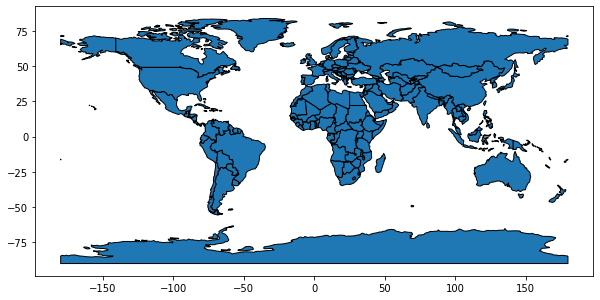

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), edgecolor="black")
plt.show()

GeoPandas is an extension of Pandas for geospatial data.
This is a vector-based plot (shapefile-like data).
What’s happening here?
The dataset contains country polygons.
We are using plot() to visualize boundaries.
Edge colors help define country borders.
How can we extend it?
Color by population (world.plot(column='pop_est', cmap='OrRd')).
Show only certain continents (world[world['continent'] == 'Africa']).
Use basemaps to improve visualization (next example).

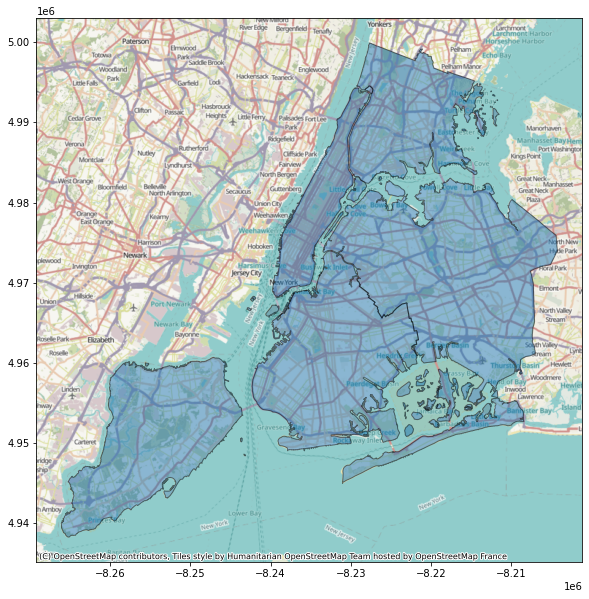

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

world = gpd.read_file(gpd.datasets.get_path('nybb'))
world_wm = world.to_crs(epsg=3857)
ax = world_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

Why do we need basemaps?
- Basemaps provide context (e.g., terrain, streets, satellite imagery).
- Without a basemap, country boundaries float in empty space.

Why do we need to reproject the data?
- Web-based maps use Web Mercator projection (EPSG:3857). contextily requires the data to be in this format.

What does this basemap show?
- This example uses CartoDB Positron, a clean, grayscale basemap.

How can we customize it?
- Use a different basemap (ctx.providers.OpenStreetMap.Mapnik).
- Change transparency (alpha=0.3 for more visibility).
- Zoom in to a specific country (world[world.name == 'United States']).

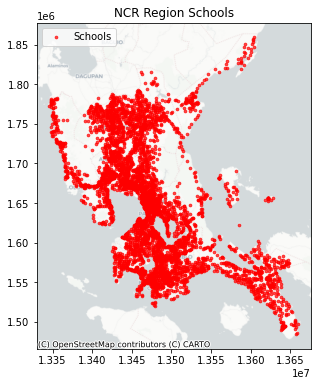

In [37]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

# Load Earthquake data (USGS live data feed)
url = "./data/for_planet.csv"
earthquakes = pd.read_csv(url)

# Convert to GeoDataFrame
gdf_eq = gpd.GeoDataFrame(earthquakes, geometry=gpd.points_from_xy(earthquakes.longitude, earthquakes.latitude))

# Set CRS and reproject for basemap compatibility
gdf_eq.set_crs(epsg=4326, inplace=True)
gdf_eq = gdf_eq.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot earthquakes (size based on magnitude)
gdf_eq.plot(ax=ax, color="red", alpha=0.7, markersize = 7, label="Schools")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.legend()
plt.title("NCR Region Schools")
plt.show()


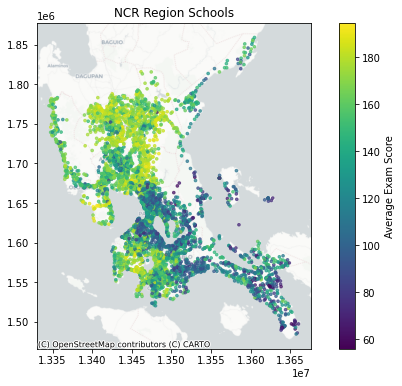

In [45]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

# Load Earthquake data (USGS live data feed)
url = "./data/for_planet.csv"
earthquakes = pd.read_csv(url)

# Convert to GeoDataFrame
gdf_eq = gpd.GeoDataFrame(earthquakes, geometry=gpd.points_from_xy(earthquakes.longitude, earthquakes.latitude))

# Set CRS and reproject for basemap compatibility
gdf_eq.set_crs(epsg=4326, inplace=True)
gdf_eq = gdf_eq.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot earthquakes (size based on magnitude)
gdf_eq.plot(ax=ax, alpha=0.7, markersize = 7, label="Schools", column = earthquakes["all_subjects"], legend=True, legend_kwds={"label": "Average Exam Score", "orientation": "vertical"})

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("NCR Region Schools")
plt.show()


In [23]:
world["continent"].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [25]:
amazon_shp_url = "https://data.apps.fao.org/catalog/dataset/620011a3-35b4-44ae-a1b6-1b0577e2f53a/resource/5f7b115d-00f7-41de-8a0c-d7d222c02eb5/download/brazil_deforestation.zip"

# Load deforestation data
amazon = gpd.read_file(amazon_shp_url)

# Set CRS and reproject for basemap
amazon = amazon.to_crs(epsg=3857)

# Plot deforestation polygons
fig, ax = plt.subplots(figsize=(10, 6))
amazon.plot(ax=ax, cmap="Reds", alpha=0.7, edgecolor="black", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

plt.title("Amazon Deforestation Over Time")
plt.show()


HTTPError: HTTP Error 403: Forbidden

In [18]:
import matplotlib.cm as cm
import numpy as np

# Add continent column by merging with the world dataset
cities["continent"] = cities.sjoin(world, predicate="within")["continent"]

# Assign a unique color to each continent
unique_continents = cities["continent"].dropna().unique()
color_map = {continent: cm.tab10(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}
cities["color"] = cities["continent"].map(color_map)

# Plot world map with colored cities
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, edgecolor="black", alpha=0.3)

# Plot each city with its assigned color
for continent, color in color_map.items():
    cities_subset = cities[cities["continent"] == continent]
    cities_subset.plot(ax=ax, color=color, markersize=5, alpha=0.7, label=continent)

plt.legend()
plt.title("Enhanced Point Map: Cities Colored by Continent")
plt.show()


/Users/heatherbaier/opt/anaconda3/envs/caoep/lib/python3.9/site-packages/geopandas/geodataframe.py:1938: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:2263




KeyError: 'continent'

In [13]:
import folium

# Create a base map centered on a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

# Add a marker
folium.Marker([37.7749, -122.4194], popup="San Francisco").add_to(m)

# Show the map
m


In [14]:
import plotly.express as px

df = px.data.gapminder()
fig = px.choropleth(df[df["year"] == 2007], locations="iso_alpha", 
                    color="pop", hover_name="country", 
                    color_continuous_scale="Viridis")
fig.show()


In [16]:
import plotly.express as px
import pandas as pd

# Load real-world airport dataset
url = "https://ourairports.com/data/airports.csv"
df = pd.read_csv(url)

# Keep only large airports
df = df[df["type"] == "large_airport"]

# Create interactive scatter map
fig = px.scatter_geo(df, lat="latitude_deg", lon="longitude_deg", 
                     hover_name="name", projection="natural earth")

fig.show()